In [1]:
#Exercise of Numerical Differential Equations - Federal University of Minas Gerais
#Comparing solutions with different methods
'''
Foward Euler
RungeKutta4
Heun
Midpoint
Taylor
'''

import numpy as np
import matplotlib.pyplot as plt

def Euler(f, y0, T, n):
    """Solve y’= f(y,t), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+1)
    y = np.zeros(n+1) # y[k] is the solution at time t[k]
    y[0] = y0
    t[0] = 0
    dt = T/float(n)
    for k in range(n):
        t[k+1] = t[k] + dt
        y[k+1] = y[k] + dt*f(y[k], t[k])
    return y, t

# derivada de y
def dy(y,t):
    return (-2/(2*(y - 1))**2)

#derivada segunda de y
def dyy(y,t):
    return (8/(2*(y - 1))**3)

def Taylor(f, y0, T, n):
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+1)
    y = np.zeros(n+1)  # y[k] is the solution at time t[k]
    
    y[0] = y0
    t[0] = 0 #t0
    dt = T/float(n)
    
    for k in range(n):
        t[k+1] = t[k] + dt  
        fk = f(y[k],t[k]) # f em t(k), y(k)
        dfk = dy(y[k],t[k]) # dy de f em t(k), y(k)
        ddfk = dyy(y[k],t[k]) # dyy de f em t(k), y(k)
        t1 = dt * fk
        t2 = ((dt**2)/2) * dfk * fk
        t3 = ((dt**3)/6) * ((ddfk * (fk**2)) + ((dfk**2) * fk))
        y[k+1] = y[k] + t1 + t2 + t3    
    return y, t

def Heun(f, y0, T, n):
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+1)
    y = np.zeros(n+1)  # y[k] is the solution at time t[k]
    dt = T/float(n)
    y[0] = y0
    t[0] = 0
    for k in range(n):
        t[k+1] = t[k] + dt
        y[k+1] = y[k] + (dt/2)*(f(y[k],t[k]) + f(y[k],t[k+1] + dt*f(y[k],t[k])))
    return y, t

def Midpoint(f, y0, T, n):
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    dt = T/float(n)
    t = np.zeros(n+1)
    y = np.zeros(n+1)  # y[k] is the solution at time t[k]
    y[0] = y0
    t[0] = 0
    for k in range(n):
        t[k+1] = t[k] + dt
        y[k+1] = y[k] + dt*f(y[k], t[k]+(dt/2) +(dt/2)*f(y[k],t[k]))
    return y, t

def RungeKutta4(f, y0, T, n):
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+1)
    y = np.zeros(n+1)
    y[0] = y0
    t[0] = 0
    dt = T/float(n)
    print('h value:',dt)
    for k in range(n):
        t[k+1] = t[k] + dt
        K1 = dt * f(y[k], t[k])
        K2 = dt * f(y[k] + 0.5*K1, t[k] + 0.5*dt)
        K3 = dt * f(y[k] + 0.5*K2, t[k] + 0.5*dt)
        K4 = dt * f(y[k] + K3, t[k] + dt)
        y[k+1] = y[k] + (1/6.0)*(K1 + 2*K2 + 2*K3 + K4)
    return y, t
    
def f(y, t):
    return 1.0/(2*(y-1))

def exact_sol(t):
    return 1 + np.sqrt(t + 0.001)
    
y0 = 1.0 + np.sqrt(0.001)

"""
With n = 64, the Runge Kutta solution is closer to the exact solution, 
while the others remain at a greater margin than the exact.
"""

'\nWith n = 64, the Runge Kutta solution is closer to the exact solution, \nwhile the others remain at a greater margin than the exact.\n'

h value: 1.0


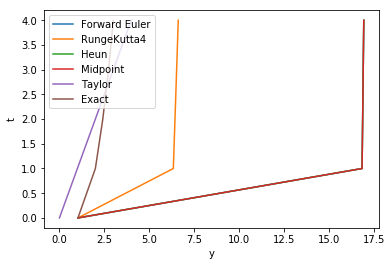

In [2]:
# running with t = 4 and n = 4 first
Euler4 = Euler(f, y0, 4, 4)
Kutta4 = RungeKutta4(f, y0, 4, 4)
Heun4 = Heun(f, y0, 4, 4)
Midpoint4 = Midpoint(f, y0, 4, 4)
Taylor4 = Taylor(f, y0, 4, 4)

plt.plot(Euler4[0], Euler4[1])
plt.plot(Kutta4[0], Kutta4[1])
plt.plot(Heun4[0], Heun4[1])
plt.plot(Midpoint4[0], Midpoint4[1])
plt.plot(Taylor4[1], Taylor4[1])
plt.plot(exact_sol(Kutta4[1]), Kutta4[1])

plt.legend(['Forward Euler','RungeKutta4','Heun','Midpoint','Taylor','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()

h value: 0.5


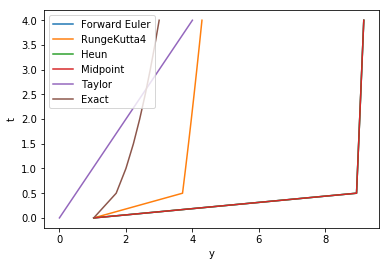

In [3]:
# running with t = 4 and n = 8
Euler8 = Euler(f, y0, 4, 8)
Kutta8 = RungeKutta4(f, y0, 4, 8)
Heun8 = Heun(f, y0, 4, 8)
Midpoint8 = Midpoint(f, y0, 4, 8)
Taylor8 = Taylor(f, y0, 4, 8)

plt.plot(Euler8[0], Euler8[1])
plt.plot(Kutta8[0], Kutta8[1])
plt.plot(Heun8[0], Heun8[1])
plt.plot(Midpoint8[0], Midpoint8[1])
plt.plot(Taylor8[1], Taylor8[1])
plt.plot(exact_sol(Kutta8[1]), Kutta8[1])

plt.legend(['Forward Euler','RungeKutta4','Heun','Midpoint','Taylor','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()

h value: 0.25


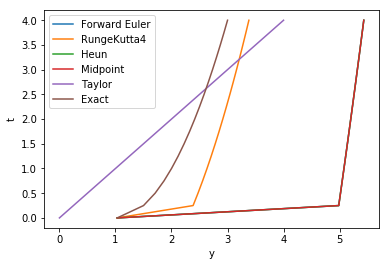

In [4]:
# running with t = 4 and n = 16
Euler16 = Euler(f, y0, 4, 16)
Kutta16 = RungeKutta4(f, y0, 4, 16)
Heun16 = Heun(f, y0, 4, 16)
Midpoint16 = Midpoint(f, y0, 4, 16)
Taylor16 = Taylor(f, y0, 4, 16)

plt.plot(Euler16[0], Euler16[1])
plt.plot(Kutta16[0], Kutta16[1])
plt.plot(Heun16[0], Heun16[1])
plt.plot(Midpoint16[0], Midpoint16[1])
plt.plot(Taylor16[1], Taylor16[1])
plt.plot(exact_sol(Kutta16[1]), Kutta16[1])

plt.legend(['Forward Euler','RungeKutta4','Heun','Midpoint','Taylor','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()

h value: 0.125


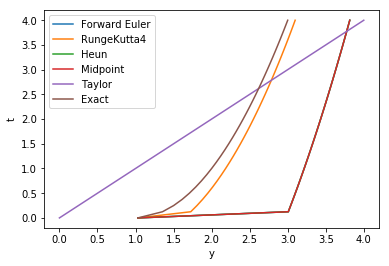

In [5]:
# running with t = 4 and n = 32
Euler32 = Euler(f, y0, 4, 32)
Kutta32 = RungeKutta4(f, y0, 4, 32)
Heun32 = Heun(f, y0, 4, 32)
Midpoint32 = Midpoint(f, y0, 4, 32)
Taylor32 = Taylor(f, y0, 4, 32)

plt.plot(Euler32[0], Euler32[1])
plt.plot(Kutta32[0], Kutta32[1])
plt.plot(Heun32[0], Heun32[1])
plt.plot(Midpoint32[0], Midpoint32[1])
plt.plot(Taylor32[1], Taylor32[1])
plt.plot(exact_sol(Kutta32[1]), Kutta32[1])

plt.legend(['Forward Euler','RungeKutta4','Heun','Midpoint','Taylor','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()